# Youtube_Trending_Video_Analytics

In [2]:
# Import required libraries
import numpy as np               # for numerical operations
import pandas as pd              # for data pre-processing & data manipulation

In [3]:
import warnings                   # Ignoring runtime warnings can simplify the output
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
df= pd.read_csv(r"C:\Users\User\Desktop\Youtube_trending_video_analytics\Dataset\youtube_data.csv")

# Data pre-processing

In [5]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


In [6]:
# shape of the dataset
df.shape

(1000, 7)

In [7]:
# check basic info(summary of the data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for all null values
df.isnull().sum()

rank             0
Video            0
Video views      0
Likes           27
Dislikes       313
Category       180
published        0
dtype: int64

In [10]:
# Summary statistics of numerical values
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2015.933000
std,288.819436,6.054847
min,1.000000,2005.000000
25%,250.750000,2010.000000
50%,500.500000,2017.000000
75%,750.250000,2021.000000
max,1000.000000,2025.000000


In [11]:
# data types of columns
df.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

In [12]:
# convert the datatype of video views, Likes and Dislikes columns from object to numeric datatype
for col in ['Video views','Likes','Dislikes']:
    if df[col].dtype=='object':
        print(f"converted {col} from object to numeric datatype")
        df[col] = df[col].str.replace(',', '').astype(float)
        
    else:
        print(f"{col} datatype is {df[col].dtype}")
    


converted Video views from object to numeric datatype
converted Likes from object to numeric datatype
converted Dislikes from object to numeric datatype


In [13]:
# check datatypes
df.dtypes

rank             int64
Video           object
Video views    float64
Likes          float64
Dislikes       float64
Category        object
published        int64
dtype: object

In [14]:
# Handling missing values

In [15]:
# Fill the missing values with median values for 'Likes' and 'Dislikes' columns
df['Likes']= df['Likes'].fillna(df['Likes'].median())
df['Dislikes']= df['Dislikes'].fillna(df['Dislikes'].median())

In [16]:
# Fill the missing values with mode  for 'Category' column
df['Category']= df['Category'].fillna(df['Category'].mode()[0])   # [0] selects the first mode as there are multiple modes.

In [17]:
df.isnull().sum()

rank           0
Video          0
Video views    0
Likes          0
Dislikes       0
Category       0
published      0
dtype: int64

In [18]:
df.to_csv(r"C:\Users\User\Desktop\Youtube_trending_video_analytics\youtube_data_cleaned.csv", index=False)

# A Power BI Report Is Created To Get Insights From The Data

In [19]:
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())


First 5 Rows of Cleaned Data:
   rank                                              Video   Video views  \
0     1  20 Tennis shots if they were not filmed, NOBOD...  3.471237e+06   
1     2  Lil Nas X - Old Town Road (Official Movie) ft....  5.407168e+07   
2     3                 JoJo Siwa - Karma (Official Video)  3.420675e+07   
3     4  Wiz Khalifa - See You Again ft. Charlie Puth [...  6.643905e+09   
4     5                       伊賀の天然水強炭酸水「家族で、シュワシェア。」篇　15秒  2.360860e+08   

        Likes  Dislikes Category  published  
0     19023.0     859.0    Music       2017  
1   3497955.0   78799.0    Music       2019  
2    293563.0     257.0    Music       2024  
3  44861602.0     257.0    Music       2015  
4        38.0     257.0    Music       2021  


# Important points to be considered from the data pre-processing

In [20]:
'''
Imputation Impact:
Imputing 313 Dislikes and 180 Category values with the median and mode, respectively, may introduce bias, 
especially if "Music" dominates due to mode imputation. We’ll verify this in EDA by checking category distribution.

Skewness: 
The large range in Video views and Likes (e.g., 38 likes vs. 44M likes) indicates right-skewed distributions, 
necessitating log transformation or robust scaling in modeling.

'''

'\nImputation Impact:\nImputing 313 Dislikes and 180 Category values with the median and mode, respectively, may introduce bias, \nespecially if "Music" dominates due to mode imputation. We’ll verify this in EDA by checking category distribution.\n\nSkewness: \nThe large range in Video views and Likes (e.g., 38 likes vs. 44M likes) indicates right-skewed distributions, \nnecessitating log transformation or robust scaling in modeling.\n\n'

# Exploratory Data Analysis

In [21]:
# Import requierd libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Set plot style
plt.style.use('seaborn')
sns.set(font_scale=1.2)

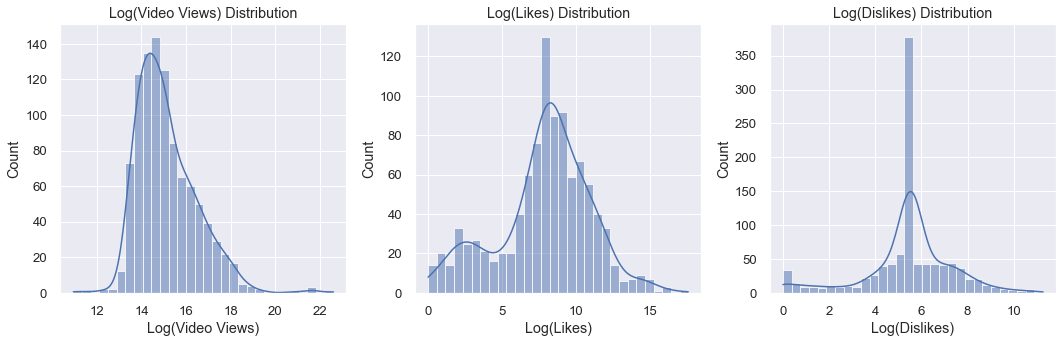

In [23]:
# 1. Distribution of Video views, Likes, and Dislikes (log scale due to skewness)
# With log scale: Values are compressed, making the plot more readable and symmetric.
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(np.log1p(df['Video views']), bins=30, kde=True)
plt.title('Log(Video Views) Distribution')
plt.xlabel('Log(Video Views)')

plt.subplot(1, 3, 2)
sns.histplot(np.log1p(df['Likes']), bins=30, kde=True)
plt.title('Log(Likes) Distribution')
plt.xlabel('Log(Likes)')

plt.subplot(1, 3, 3)
sns.histplot(np.log1p(df['Dislikes']), bins=30, kde=True)
plt.title('Log(Dislikes) Distribution')
plt.xlabel('Log(Dislikes)')

plt.tight_layout()
plt.show()

In [24]:
'''
Log(Video Views) Distribution:: 
The skewness confirms the need for log transformation of Video views during modeling to normalize the target variable 
and improve regression performance.

Log(Likes) Distribution:
Log transformation of Likes will be necessary for modeling to handle skewness.

Log(Dislikes) Distribution:
Log transformation of Dislikes is required because of Extremely skewed, with a sharp peak at 5–6.

'''

'\nLog(Video Views) Distribution:: \nThe skewness confirms the need for log transformation of Video views during modeling to normalize the target variable \nand improve regression performance.\n\nLog(Likes) Distribution:\nLog transformation of Likes will be necessary for modeling to handle skewness.\n\nLog(Dislikes) Distribution:\nLog transformation of Dislikes is required because of Extremely skewed, with a sharp peak at 5–6.\n\n'

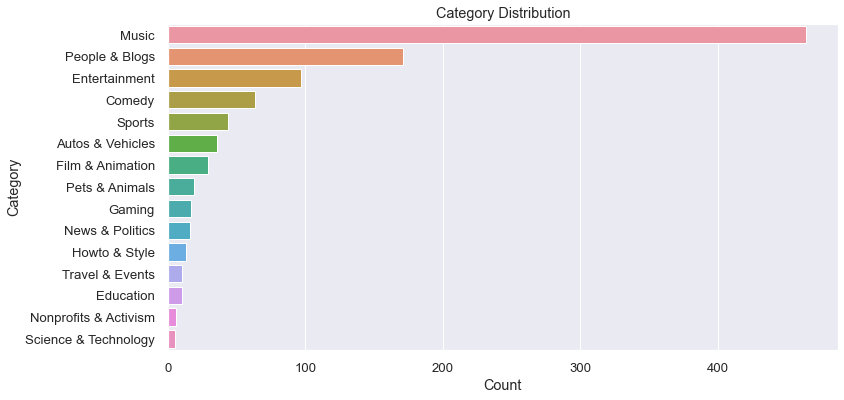

In [25]:
# 2. Category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [26]:
'''
The imbalance in Category (46% Music) may bias models toward Music videos. We can encode Category using encoding technique, 
and consider techniques like oversampling or class-weighted modeling to address imbalance.

'''

'\nThe imbalance in Category (46% Music) may bias models toward Music videos. We can encode Category using encoding technique, \nand consider techniques like oversampling or class-weighted modeling to address imbalance.\n\n'

Text(0, 0.5, 'Log(Video Views)')

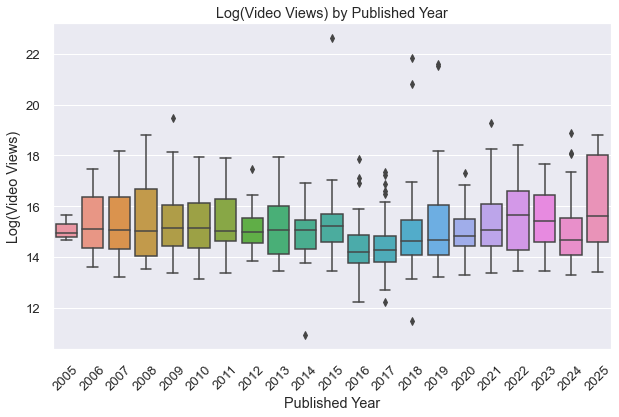

In [27]:
# 3. Video views by Published Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='published', y=np.log1p(df['Video views']), data=df)
plt.title('Log(Video Views) by Published Year')
plt.xticks(rotation=45)
plt.xlabel('Published Year')
plt.ylabel('Log(Video Views)')

In [28]:
'''
Median video views (log-transformed) were highest in the early years (2005–2008), dipped between 2015–2019, 
and have been rising again since 2020.

The spread and number of outliers have increased in recent years, especially in 2025, indicating more variability 
and potential for viral content.

'''

'\nMedian video views (log-transformed) were highest in the early years (2005–2008), dipped between 2015–2019, \nand have been rising again since 2020.\n\nThe spread and number of outliers have increased in recent years, especially in 2025, indicating more variability \nand potential for viral content.\n\n'

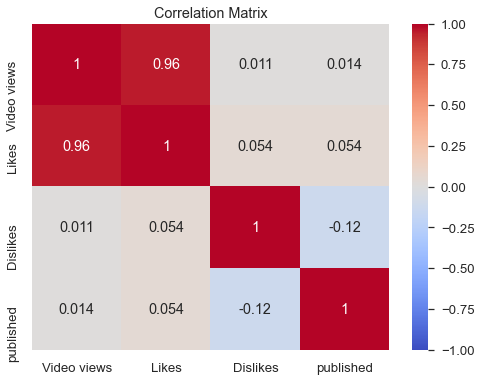

In [29]:
# 4. Correlation matrix
plt.figure(figsize=(8, 6))
corr = df[['Video views', 'Likes', 'Dislikes', 'published']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [30]:
'''
The high correlation between Video views and Likes Strong positive correlation (0.96), indicating that Likes is a key predictor 
of Video views but risks multicollinearity in linear models, but tree-based models(e.g., Random Forest, XGBoost) can handle this.
'''

'\nThe high correlation between Video views and Likes Strong positive correlation (0.96), indicating that Likes is a key predictor \nof Video views but risks multicollinearity in linear models, but tree-based models(e.g., Random Forest, XGBoost) can handle this.\n'

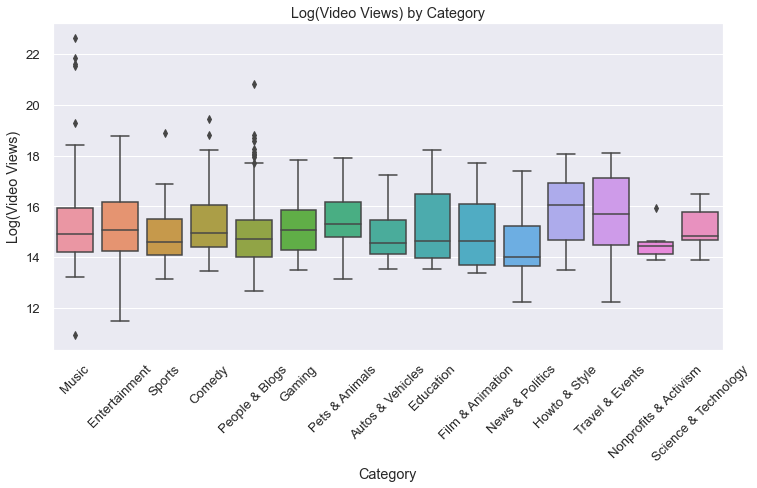

In [31]:
# 5. Video views by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y=np.log1p(df['Video views']), data=df)
plt.title('Log(Video Views) by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Log(Video Views)')
plt.show()

In [32]:
'''
Category is a significant predictor of views, with "Music" and "Entertainment" driving higher views. 
One-hot encoding or target encoding of Category will capture this effect in the model.

'''

'\nCategory is a significant predictor of views, with "Music" and "Entertainment" driving higher views. \nOne-hot encoding or target encoding of Category will capture this effect in the model.\n\n'

In [33]:
# 6. Summary statistics
print("Summary Statistics:")
print(df.describe())
print("\nCategory Counts:")
print(df['Category'].value_counts())

Summary Statistics:
              rank   Video views         Likes      Dislikes    published
count  1000.000000  1.000000e+03  1.000000e+03   1000.000000  1000.000000
mean    500.500000  2.489022e+07  1.550064e+05   1234.340000  2015.933000
std     288.819436  2.549269e+08  1.587651e+06   4768.724503     6.054847
min       1.000000  5.657800e+04  0.000000e+00      0.000000  2005.000000
25%     250.750000  1.405386e+06  6.420000e+02    145.750000  2010.000000
50%     500.500000  2.829316e+06  3.604000e+03    257.000000  2017.000000
75%     750.250000  8.164931e+06  2.024575e+04    525.750000  2021.000000
max    1000.000000  6.643905e+09  4.486160e+07  78799.000000  2025.000000

Category Counts:
Music                    464
People & Blogs           171
Entertainment             97
Comedy                    63
Sports                    44
Autos & Vehicles          36
Film & Animation          29
Pets & Animals            19
Gaming                    17
News & Politics           16
Howto 

In [34]:
'''
The summary statistics reinforce the need for log transformation of Video views, Likes, and Dislikes. 
The published year distribution suggests a video_age feature will be useful.

'''

'\nThe summary statistics reinforce the need for log transformation of Video views, Likes, and Dislikes. \nThe published year distribution suggests a video_age feature will be useful.\n\n'

# Key Takeaways from exploratory data analysis useful for Next Steps


In [35]:
'''
-> Transformations: Log-transform Video views, Likes, and Dislikes to handle skewness.

-> Feature Engineering: Create video_age (2025 - published) to capture the effect of time on views. 
   Encode Category using one-hot or target encoding.

-> Category Imbalance: Address the dominance of "Music" by either grouping rare categories or using techniques like 
   target encoding to reduce dimensionality.

-> Feature Selection: Likes is a strong predictor (high correlation with Video views), while Dislikes may be less impactful. 
   We’ll assess feature importance during modeling.

-> Modeling Strategy: Given the correlations and non-linear relationships (e.g., views by category), tree-based models 
   like Random Forest or XGBoost are likely to perform well.

'''

'\n-> Transformations: Log-transform Video views, Likes, and Dislikes to handle skewness.\n\n-> Feature Engineering: Create video_age (2025 - published) to capture the effect of time on views. \n   Encode Category using one-hot or target encoding.\n\n-> Category Imbalance: Address the dominance of "Music" by either grouping rare categories or using techniques like \n   target encoding to reduce dimensionality.\n\n-> Feature Selection: Likes is a strong predictor (high correlation with Video views), while Dislikes may be less impactful. \n   We’ll assess feature importance during modeling.\n\n-> Modeling Strategy: Given the correlations and non-linear relationships (e.g., views by category), tree-based models \n   like Random Forest or XGBoost are likely to perform well.\n\n'

# Feature Engineering

In [36]:
# Log transform Video views, Likes, and Dislikes
df['log_video_views'] = np.log1p(df['Video views'])
df['log_likes'] = np.log1p(df['Likes'])
df['log_dislikes'] = np.log1p(df['Dislikes'])

In [37]:
# Create video_age feature to capture the effect of time on views
df['video_age'] = 2025 - df['published']

In [38]:
# Target encode Category based on mean log_video_views
category_means = df.groupby('Category')['log_video_views'].mean()
df['category_encoded'] = df['Category'].map(category_means)

In [39]:
# Drop unnecessary columns
df = df.drop(columns=['Video', 'rank', 'Video views', 'Likes', 'Dislikes', 'published', 'Category'])

In [40]:
# Scale numerical features (log_likes, log_dislikes, video_age)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['log_likes', 'log_dislikes', 'video_age']])
df[['log_likes', 'log_dislikes', 'video_age']] = scaled_features

In [41]:
# Summary of engineered dataset
print("Engineered Dataset Info:")
print(df.info())
print("\nFirst 5 Rows of Engineered Data:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Engineered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   log_video_views   1000 non-null   float64
 1   log_likes         1000 non-null   float64
 2   log_dislikes      1000 non-null   float64
 3   video_age         1000 non-null   float64
 4   category_encoded  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None

First 5 Rows of Engineered Data:
   log_video_views  log_likes  log_dislikes  video_age  category_encoded
0        15.060022   0.632586      0.682547  -0.176311         15.169778
1        17.805821   2.283666      3.024632  -0.506790         15.169778
2        17.347933   1.499061      0.058384  -1.332988         15.169778
3        22.616966   3.091564      0.058384   0.154169         15.169778
4        19.279707  -1.327436      0.058384  -0.837269         15.169778

Summary Statistics:
  

# Key Takeaways:

In [42]:
# -> The dataset is now fully numerical, scaled, and ready for modeling.
# -> log_likes and category_encoded are likely to be strong predictors based on EDA correlations and category effects.
# -> log_dislikes may have limited predictive power due to imputation clustering.
# -> video_age captures temporal effects and should help the model account for view accumulation over time.

# Model Selection, Training and Evaluation

In [43]:
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Define features and target
X = df[['log_likes', 'log_dislikes', 'video_age', 'category_encoded']]
y = df['log_video_views']

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [47]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R2': r2}
    
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")


Linear Regression Results:
RMSE: 1.2634
R2: 0.1283

Random Forest Results:
RMSE: 0.8897
R2: 0.5677

XGBoost Results:
RMSE: 0.9721
R2: 0.4840


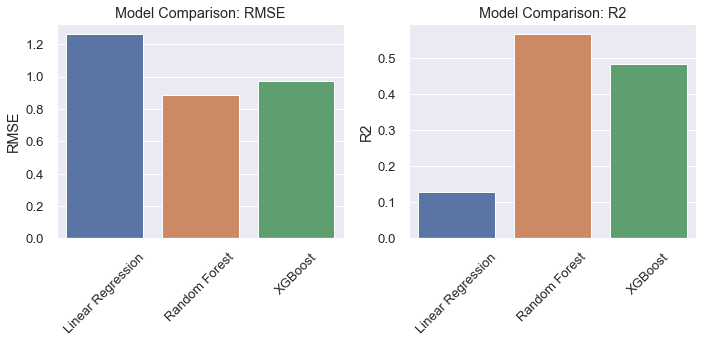

In [48]:
# Plot model comparison
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='RMSE', data=results_df)
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('Model Comparison: R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [49]:
# Feature importance for the best model
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
if best_model_name in ['Random Forest', 'XGBoost']:
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f'Feature Importance ({best_model_name})')
    plt.xlabel('Importance')
    plt.savefig('feature_importance.png')
    plt.close()
    print(f"\nFeature Importance ({best_model_name}):")
    print(feature_importance)


Feature Importance (Random Forest):
log_likes           0.534702
log_dislikes        0.220863
video_age           0.191926
category_encoded    0.052509
dtype: float64


# Analysis of Model Training Results

# Model Performance Metrics:

In [50]:
# Linear Regression performs poorly, with a high RMSE and low R².
# Random Forest outperforms the other models, with the lowest RMSE (0.8897) and highest R² (0.5677) 56.77% of variance.
# XGBoost performs better than Linear Regression but worse than Random Forest, with an RMSE of 0.9721 and R² of 0.4840.

# Key Takeaways

In [51]:
#  Random Forest is the best model with RMSE = 0.8897 and R² = 0.5677, and will be the focus of hyperparameter tuning.


In [52]:
# log_likes is the dominant predictor, while category_encoded underperforms, likely due to category imbalance.


In [53]:
# The model explains 56.77% of the variance, which is a good starting point but can be improved through tuning.

# Hyperparameter Tuning

In [54]:
# Define features and target
X = df[['log_likes', 'log_dislikes', 'video_age', 'category_encoded']]
y = df['log_video_views']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

In [58]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation RMSE: 0.8967935029782246


In [59]:
# Evaluate the tuned model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTuned Random Forest Results:")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


Tuned Random Forest Results:
RMSE: 0.8622
R2: 0.5940


In [60]:
# Compare with baseline (untuned) Random Forest
baseline_rmse = 0.8897  # From previous results
baseline_r2 = 0.5677
print("\nBaseline Random Forest Results (for comparison):")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"R2: {baseline_r2:.4f}")


Baseline Random Forest Results (for comparison):
RMSE: 0.8897
R2: 0.5677



Feature Importance (Tuned Random Forest):
log_likes           0.548400
log_dislikes        0.221257
video_age           0.187588
category_encoded    0.042755
dtype: float64


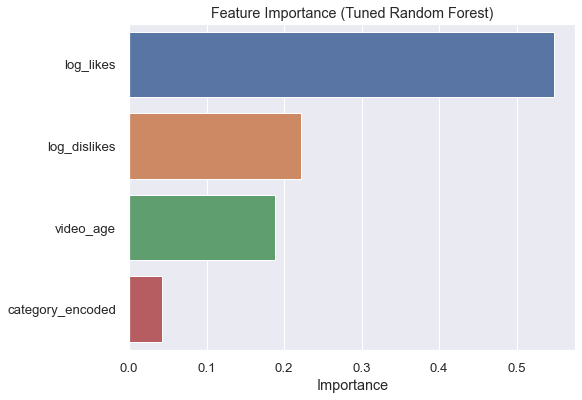

In [61]:
# Feature importance for the tuned model
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Tuned Random Forest)')
plt.xlabel('Importance')

print("\nFeature Importance (Tuned Random Forest):")
print(feature_importance)

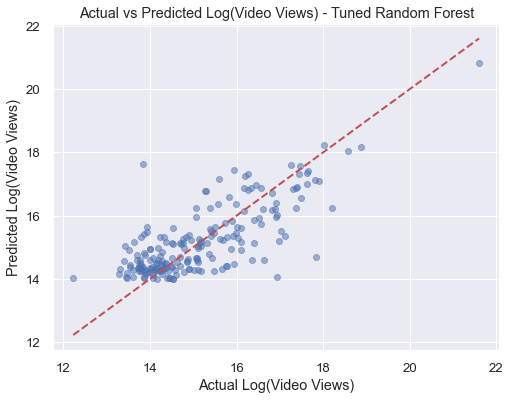

In [62]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log(Video Views)')
plt.ylabel('Predicted Log(Video Views)')
plt.title('Actual vs Predicted Log(Video Views) - Tuned Random Forest')
plt.show()

# Insights from Hyperperameter Tuning

In [63]:

'''
Hyperparameter tuning improved the Random Forest’s performance, achieving an RMSE of 0.8622 and R² of 0.5940, 
making it a solid model for predicting YouTube video views.

'''

'\nHyperparameter tuning improved the Random Forest’s performance, achieving an RMSE of 0.8622 and R² of 0.5940, \nmaking it a solid model for predicting YouTube video views.\n\n'

# Recommendations, Limitations and Conclusion

# Recommendations for Stakeholders

In [64]:

'''
For Content Creators:
    
Focus on maximizing viewer engagement, particularly likes, as they strongly correlate with higher views.
Encourage interaction through calls-to-action (e.g., “Like this video if you enjoyed it!”).

While older videos accumulate more views over time, newer videos can still perform well with strong initial engagement.
Prioritize creating high-quality, engaging content to boost likes early on.

Categories like "Music" and "Entertainment" tend to have higher views, but the model’s low reliance on 
category_encoded suggests that engagement matters more than category. Focus on content quality over category choice.

For Marketers:
    
Identify videos with high like-to-view ratios for advertising campaigns, as these are likely to have broader reach and 
engagement.

Target older videos in popular categories (e.g., "Music") for long-term campaigns, as they have accumulated significant 
views over time.

Invest in content that drives immediate engagement (likes) to maximize short-term viewership, especially for newer videos.

'''

'\nFor Content Creators:\n    \nFocus on maximizing viewer engagement, particularly likes, as they strongly correlate with higher views.\nEncourage interaction through calls-to-action (e.g., “Like this video if you enjoyed it!”).\n\nWhile older videos accumulate more views over time, newer videos can still perform well with strong initial engagement.\nPrioritize creating high-quality, engaging content to boost likes early on.\n\nCategories like "Music" and "Entertainment" tend to have higher views, but the model’s low reliance on \ncategory_encoded suggests that engagement matters more than category. Focus on content quality over category choice.\n\nFor Marketers:\n    \nIdentify videos with high like-to-view ratios for advertising campaigns, as these are likely to have broader reach and \nengagement.\n\nTarget older videos in popular categories (e.g., "Music") for long-term campaigns, as they have accumulated significant \nviews over time.\n\nInvest in content that drives immediate en

# Limitations

In [65]:
'''

Unexplained Variance: The model explains 59.4% of the variance, leaving ~40% unaccounted for. Additional features 
(e.g., video duration, upload frequency, social media shares) could improve performance.

Category Encoding: The low impact of category_encoded suggests exploring alternative encoding methods, such as 
one-hot encoding or grouping rare categories into an "Other" category.

Imputation Bias: The median imputation of Dislikes introduced clustering, potentially inflating its importance. 
Future work could use category-specific imputation or predictive imputation (e.g., using a model to predict missing dislikes).

Outlier Handling: The model underpredicts viral videos (>100M views). Techniques like outlier-specific modeling or 
additional features capturing virality could address this.

'''

'\n\nUnexplained Variance: The model explains 59.4% of the variance, leaving ~40% unaccounted for. Additional features \n(e.g., video duration, upload frequency, social media shares) could improve performance.\n\nCategory Encoding: The low impact of category_encoded suggests exploring alternative encoding methods, such as \none-hot encoding or grouping rare categories into an "Other" category.\n\nImputation Bias: The median imputation of Dislikes introduced clustering, potentially inflating its importance. \nFuture work could use category-specific imputation or predictive imputation (e.g., using a model to predict missing dislikes).\n\nOutlier Handling: The model underpredicts viral videos (>100M views). Techniques like outlier-specific modeling or \nadditional features capturing virality could address this.\n\n'

# Conclusion

In [66]:
'''
This project successfully developed a Random Forest model to predict YouTube video views, 
which achieved an RMSE of 0.8622 and R² of 0.5940 after hyperparameter tuning. 

The model highlights the importance of viewer engagement (likes) as the primary driver of views.
While the model provides actionable insights for content creators and marketers, future work could enhance performance 
by incorporating additional features, improving category encoding, and addressing imputation biases.

'''

'\nThis project successfully developed a Random Forest model to predict YouTube video views, \nwhich achieved an RMSE of 0.8622 and R² of 0.5940 after hyperparameter tuning. \n\nThe model highlights the importance of viewer engagement (likes) as the primary driver of views.\nWhile the model provides actionable insights for content creators and marketers, future work could enhance performance \nby incorporating additional features, improving category encoding, and addressing imputation biases.\n\n'